In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_parquet('/content/drive/MyDrive/Orga Datos/TP3/train.parquet')
train_df.content.fillna(' ', inplace=True)

In [3]:
def llenar_nulos(df):
  df['n_tokens_title'].fillna(df['n_tokens_title'].mean(), inplace=True)
  df['n_tokens_content'].fillna(df['n_tokens_content'].mean(), inplace=True)
  df['n_non_stop_unique_tokens'].fillna(df['n_non_stop_unique_tokens'].mean(), inplace=True)
  df['num_hrefs'].fillna(float(df['num_hrefs'].mode()), inplace=True)
  df['num_self_hrefs'].fillna(float(df['num_self_hrefs'].mode()), inplace=True)
  df['num_imgs'].fillna(df['num_imgs'].min(), inplace=True)
  df['num_videos'].fillna(df['num_videos'].min(), inplace=True)
  df['LDA_00'].fillna(df['LDA_00'].mean(), inplace=True)
  df['LDA_01'].fillna(df['LDA_01'].mean(), inplace=True)
  df['LDA_02'].fillna(df['LDA_02'].mean(), inplace=True)
  df['LDA_03'].fillna(df['LDA_03'].mean(), inplace=True)
  df['kw_min_min'].fillna(float(df['kw_min_min'].mode()), inplace=True)
  df['kw_max_min'].fillna(float(df['kw_max_min'].mode()), inplace=True)
  df['kw_min_avg'].fillna(float(df['kw_min_avg'].mode()), inplace=True)
  df['kw_avg_min'].fillna(float(df['kw_avg_min'].mode()), inplace=True)
  df['kw_min_max'].fillna(float(df['kw_min_max'].mode()), inplace=True)
  df['kw_max_max'].fillna(float(df['kw_max_max'].mode()), inplace=True)
  df['kw_min_avg'].fillna(float(df['kw_min_avg'].mode()), inplace=True)
  df['self_reference_avg_sharess'].fillna(float(df['self_reference_avg_sharess'].mode()), inplace=True)
  df['max_positive_polarity'].fillna(df['max_positive_polarity'].max(), inplace=True)

  df.fillna(0.0, inplace=True)

In [4]:
llenar_nulos(train_df)

In [5]:
df = train_df[['title_subjectivity', 'popular']]

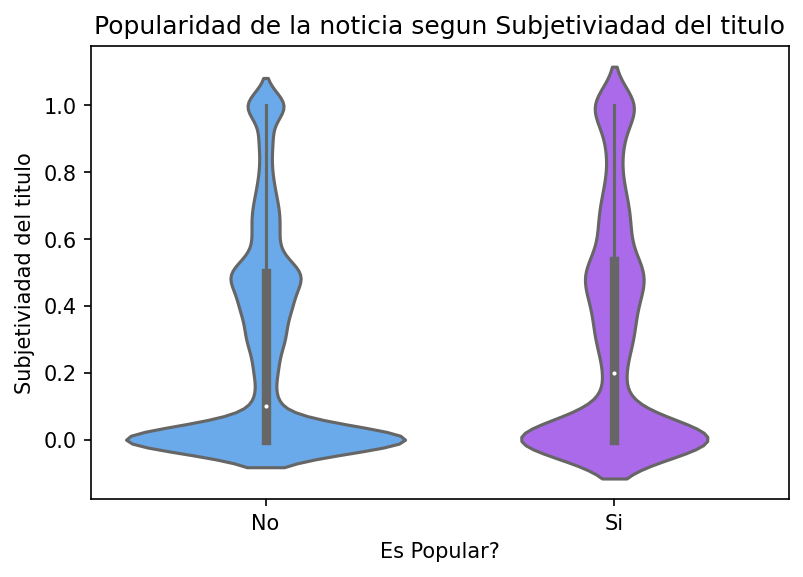

In [6]:
plt.figure(dpi=150)
sns.violinplot(data=df, x='popular', y='title_subjectivity', palette='cool')
plt.title("Popularidad de la noticia segun Subjetiviadad del titulo")
plt.xlabel("Es Popular?")
plt.ylabel("Subjetiviadad del titulo")
plt.xticks(ticks=[0,1], labels=['No', 'Si'])
plt.show()

In [7]:
df2 = train_df[['popular', 'n_tokens_title']]

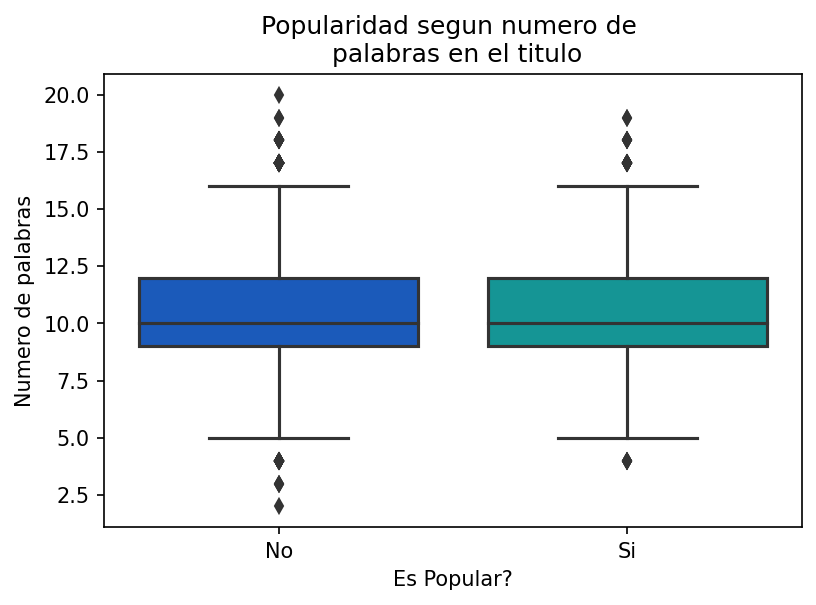

In [18]:
plt.figure(dpi=150)
sns.boxplot(data=df2, x='popular', y='n_tokens_title', palette='winter')
plt.title("Popularidad segun numero de \n palabras en el titulo")
plt.ylabel("Numero de palabras")
plt.xlabel("Es Popular?")
plt.xticks(ticks=[0,1], labels=['No', 'Si'])
plt.show()

In [9]:
df3 = train_df[['title_sentiment_polarity','popular']]

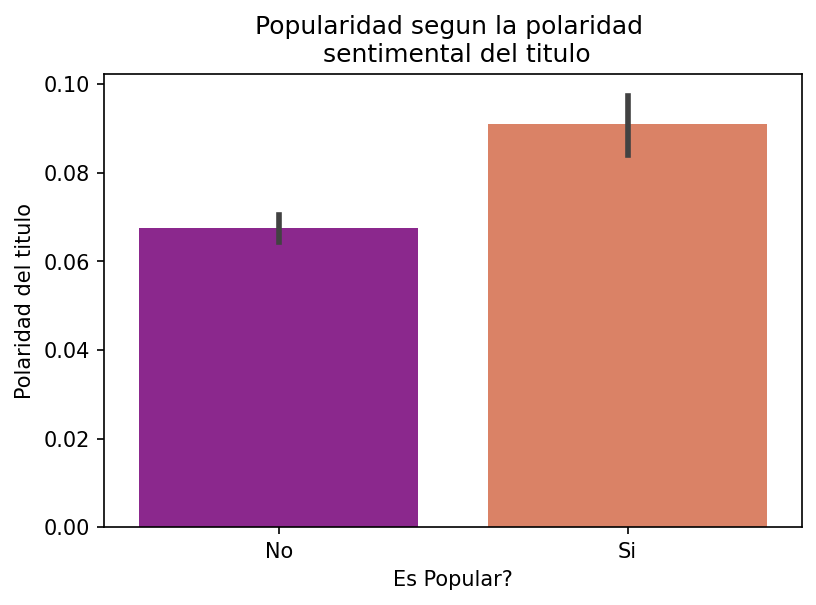

In [10]:
plt.figure(dpi=150)
sns.barplot(data=df3, x='popular', y='title_sentiment_polarity', palette='plasma')
plt.title("Popularidad segun la polaridad \n sentimental del titulo")
plt.ylabel("Polaridad del titulo")
plt.xlabel("Es Popular?")
plt.xticks(ticks=[0,1], labels=['No', 'Si'])
plt.show()

In [ ]:
df4 = train_df[['num_hrefs', 'num_imgs', 'popular']]
df4.rename(columns={'num_hrefs': 'Hiper-Ref', 'num_imgs': 'Imagenes', 'popular': "Popularidad"}, inplace=True)
df4 = df4.corr()

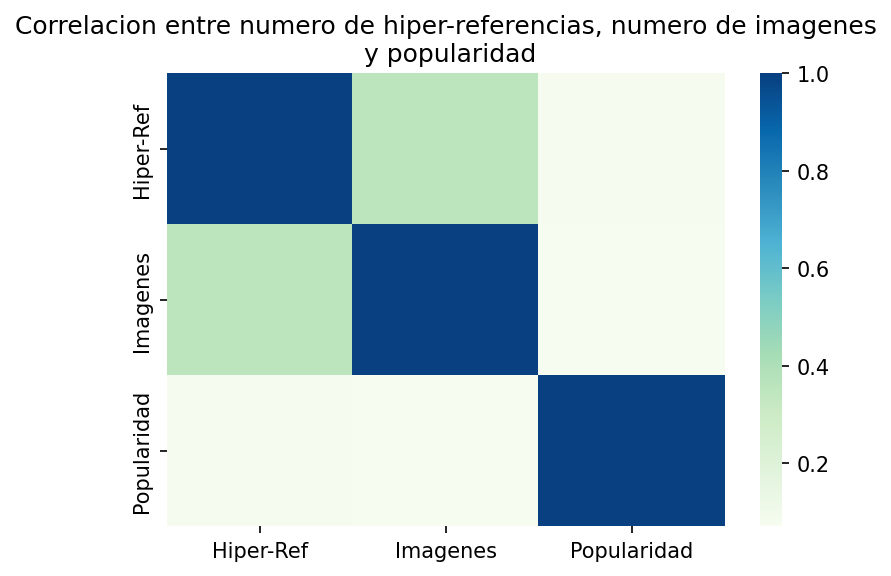

In [12]:
plt.figure(dpi=150)
sns.heatmap(df4, cmap='GnBu')
plt.title("Correlacion entre numero de hiper-referencias, numero de imagenes\n y popularidad")
plt.show()

In [13]:
df5 = train_df[['data_channel_is_entertainment', 'popular']]

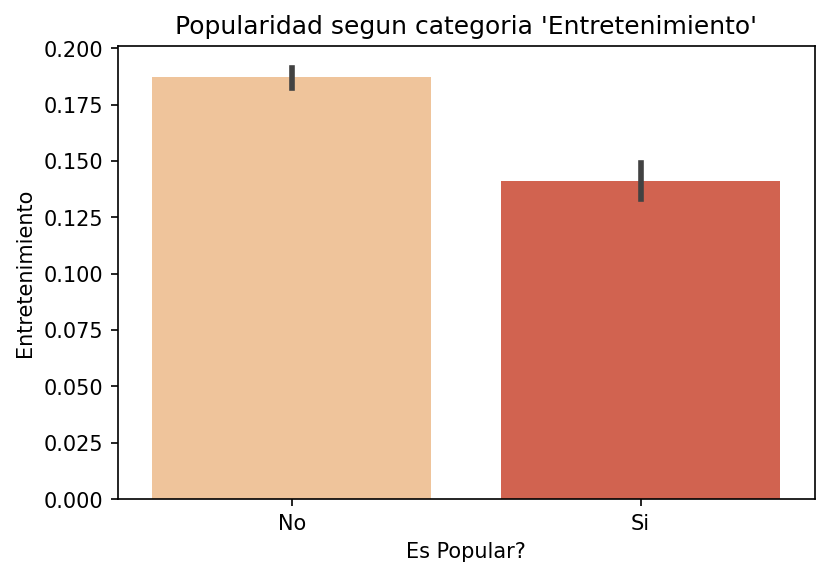

In [14]:
plt.figure(dpi=150)
sns.barplot(data=df5, x='popular', y='data_channel_is_entertainment', palette='OrRd')
plt.title("Popularidad segun categoria 'Entretenimiento'")
plt.ylabel("Entretenimiento")
plt.xlabel("Es Popular?")
plt.xticks(ticks=[0,1], labels=['No', 'Si'])
plt.show()

In [ ]:
df6 = train_df[['global_subjectivity', 'data_channel_is_world', 'popular', 'abs_title_sentiment_polarity']]
df6.rename(columns={'global_subjectivity': 'Subjetividad', 'data_channel_is_world': 'Categoria Mundo',\
                                  'popular': 'Popularidad', "abs_title_sentiment_polarity": 'Polaridad Sentimental'}, inplace=True)
df6 = df6.corr()

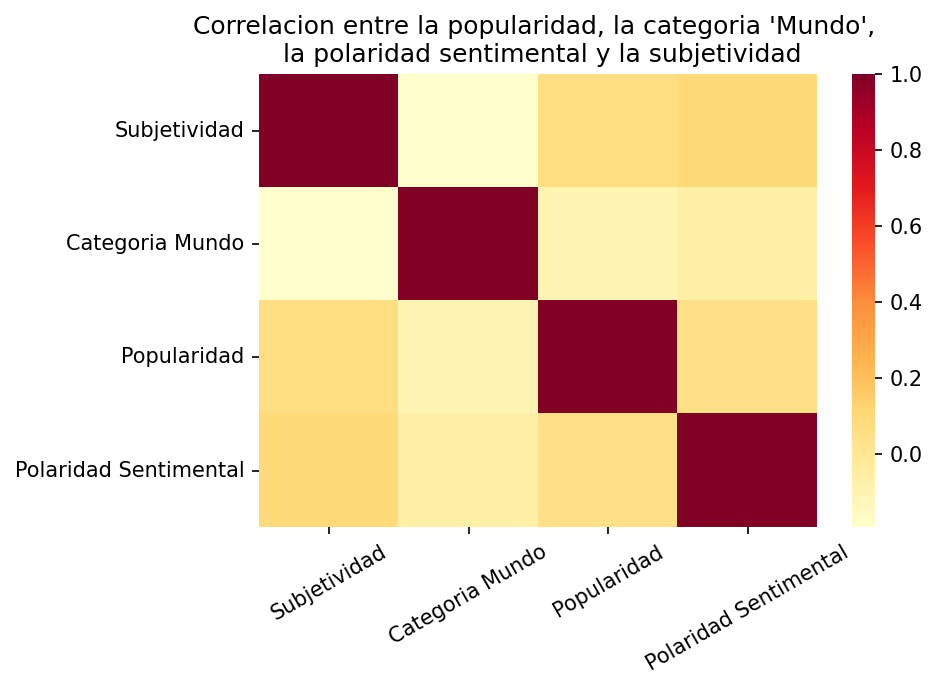

In [16]:
plt.figure(dpi=150)
sns.heatmap(df6, cmap='YlOrRd')
plt.title("Correlacion entre la popularidad, la categoria 'Mundo', \n la polaridad sentimental y la subjetividad")
plt.xticks(rotation=30)
plt.show()